---
title: Data Visualization Using Plotnine
author: Owen Barberie
format: 
    html:
        toc: true
        code-fold: true
---



The Palmer Penguins dataset had a variety of column types with which to explore some nice visualizations. The `mtcars` dataset is another popular dataset for doing some simple data work, but does not contain the same types of variables.

Run the following code to load the `mtcars` dataset and explore the observations and variables contained within. To learn more about this dataset check out [this site](https://stat.ethz.ch/R-manual/R-devel/library/datasets/html/mtcars.html)

In [1]:
import statsmodels.api as sm
import pandas as pd

mtcars = sm.datasets.get_rdataset("mtcars", "datasets", cache=True).data
df = pd.DataFrame(mtcars)

In [2]:
df

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
rownames,,,,,,,,,,,
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2


The statement "the `mtcars` dataset does not contain the same types of variables as the penguins dataset" is a little true and a little false. There are no variables that contain text values, BUT there are variables that it makes sense to consider categorical variables. In most situations, it makes sense to treat the values of categorical variables as text values instead of numeric values.

Use the `astype()` method to convert the categorical variables of the `mtcars` (df) dataset to have text values in the code chunk below. We've done one for you!

In [22]:
df["am"] = df["am"].astype(str)
# Convert the other variables below
df["cyl"] = df["cyl"].astype(str)
df["vs"] = df["vs"].astype(str)
df["gear"] = df["gear"].astype(str)
df["carb"] = df["carb"].astype(str)


In [10]:
import pandas as pd
from plotnine import ggplot, geom_point, aes, geom_boxplot, geom_histogram

In [6]:
df

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
rownames,,,,,,,,,,,
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2


If you print out your new dataset, is it clear that the variables have been converted to text values? If so, how can you tell?

It should also be clear by how `plotnine` treats these variables.

1. Create side-by-side boxplots of the `mpg` variable by the different values of the `am` variable. What happens if you convert the `am` variable back to float values and then try to create this same plot? Explain the differences between the two plots.

2. Create overlaid histograms of the `hp` variable for the different values of the `cyl` variable. What happens if you convert the `cyl` variable back to float values and then try to create this same plot? Explain the differences between the two plots.

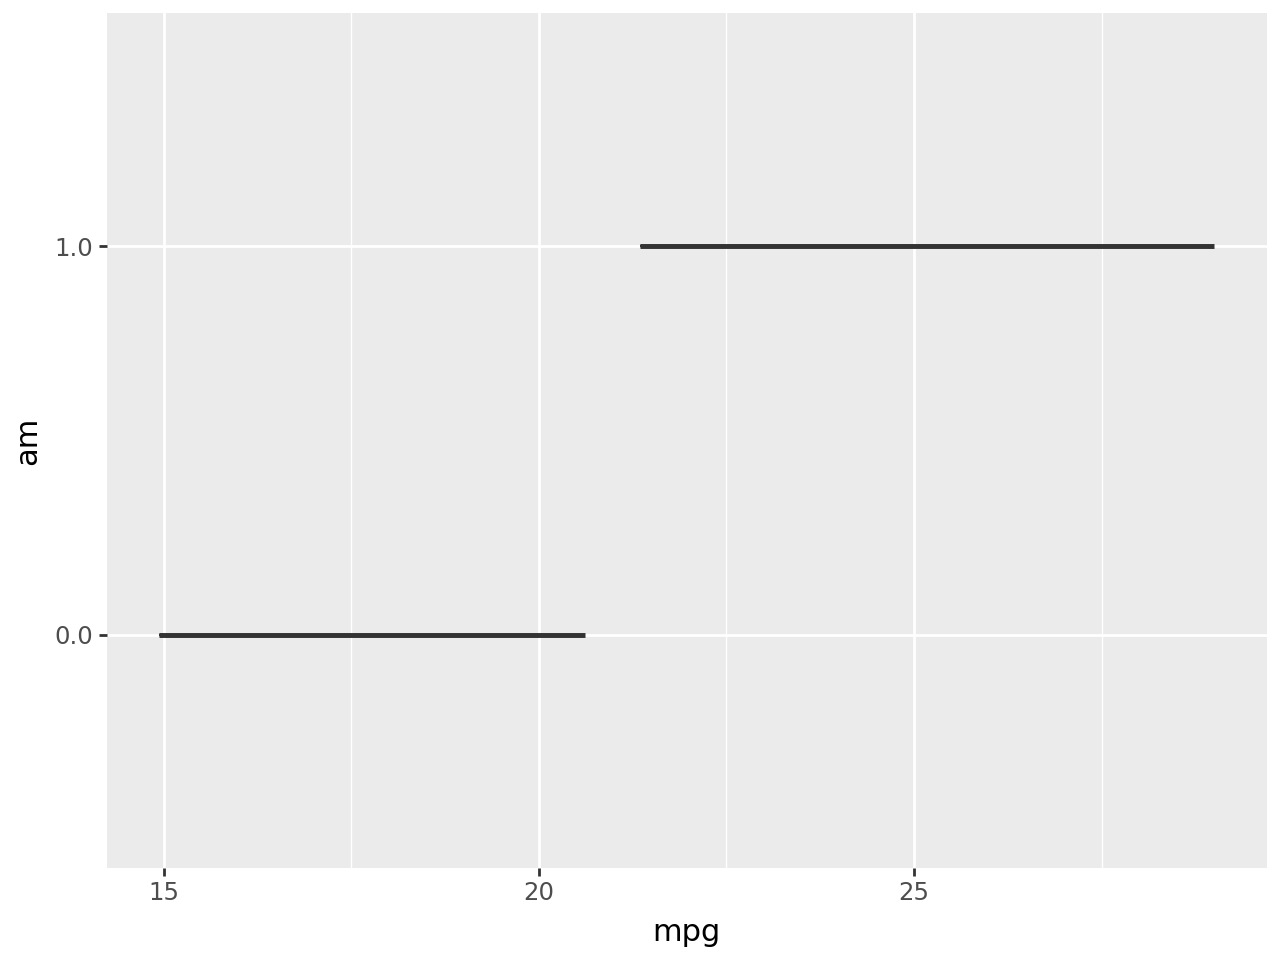

In [19]:
# Create plot for (1) here

(ggplot(df,
aes(
  x = "mpg",
  y = "am",
  ))
+ geom_boxplot()
)

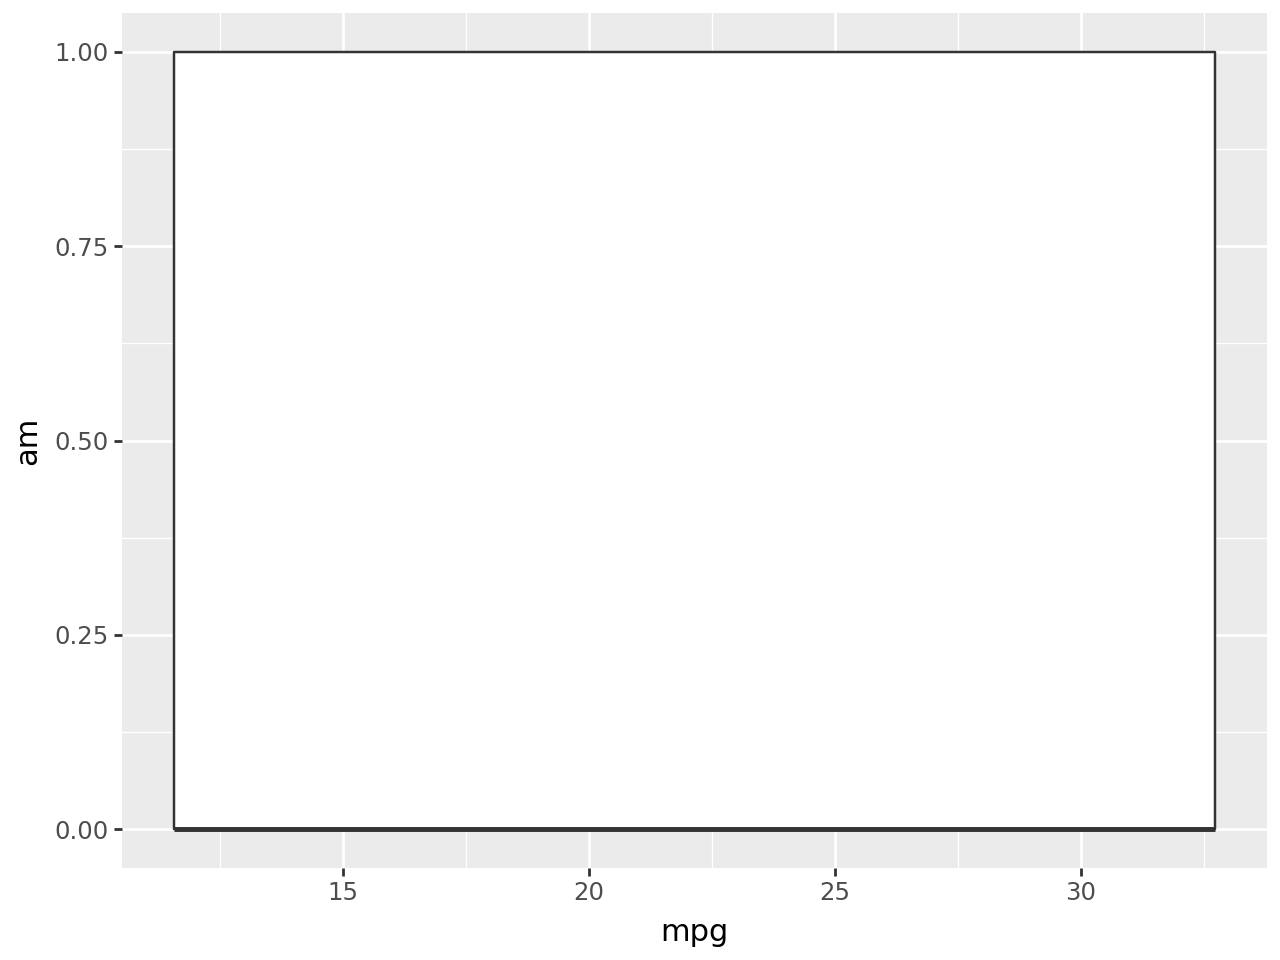

In [13]:
# When you convert am to float
df["am"] = df["am"].astype(float)
(ggplot(df,
aes(
  x = "hp",
  y = "cyl",
  ))
+ geom_boxplot()
)

When "am" is converted back to float, the ggplot function does not visually represent anything with significance.

/usr/local/lib/python3.10/dist-packages/plotnine/stats/stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 6'. Pick better value with 'binwidth'.


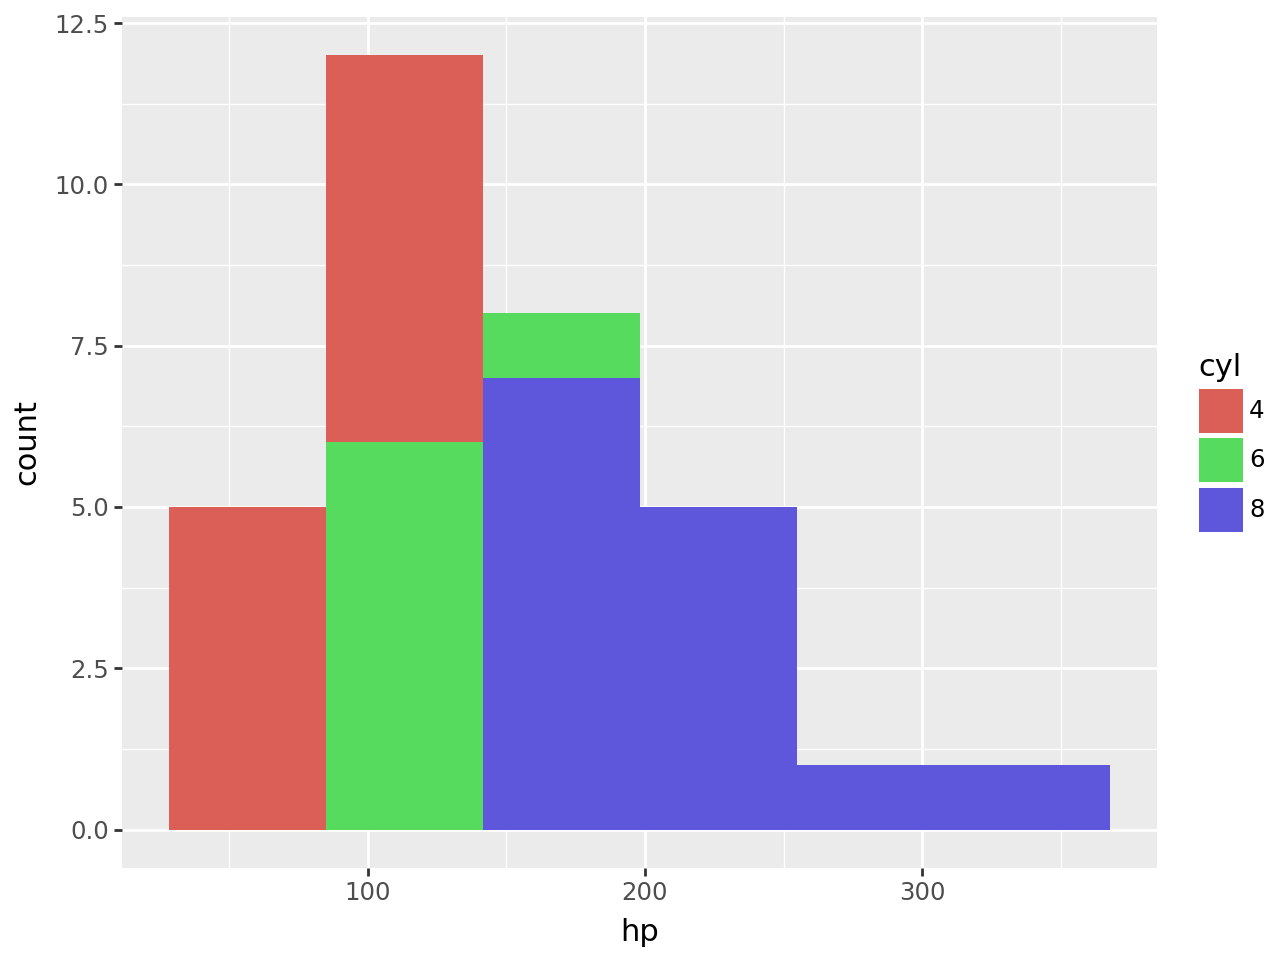

In [20]:
# Create plot for (2) here
(ggplot(df,
aes(
  x = "hp",
  fill = "cyl",
  ))
+ geom_histogram()
)

/usr/local/lib/python3.10/dist-packages/plotnine/stats/stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 6'. Pick better value with 'binwidth'.


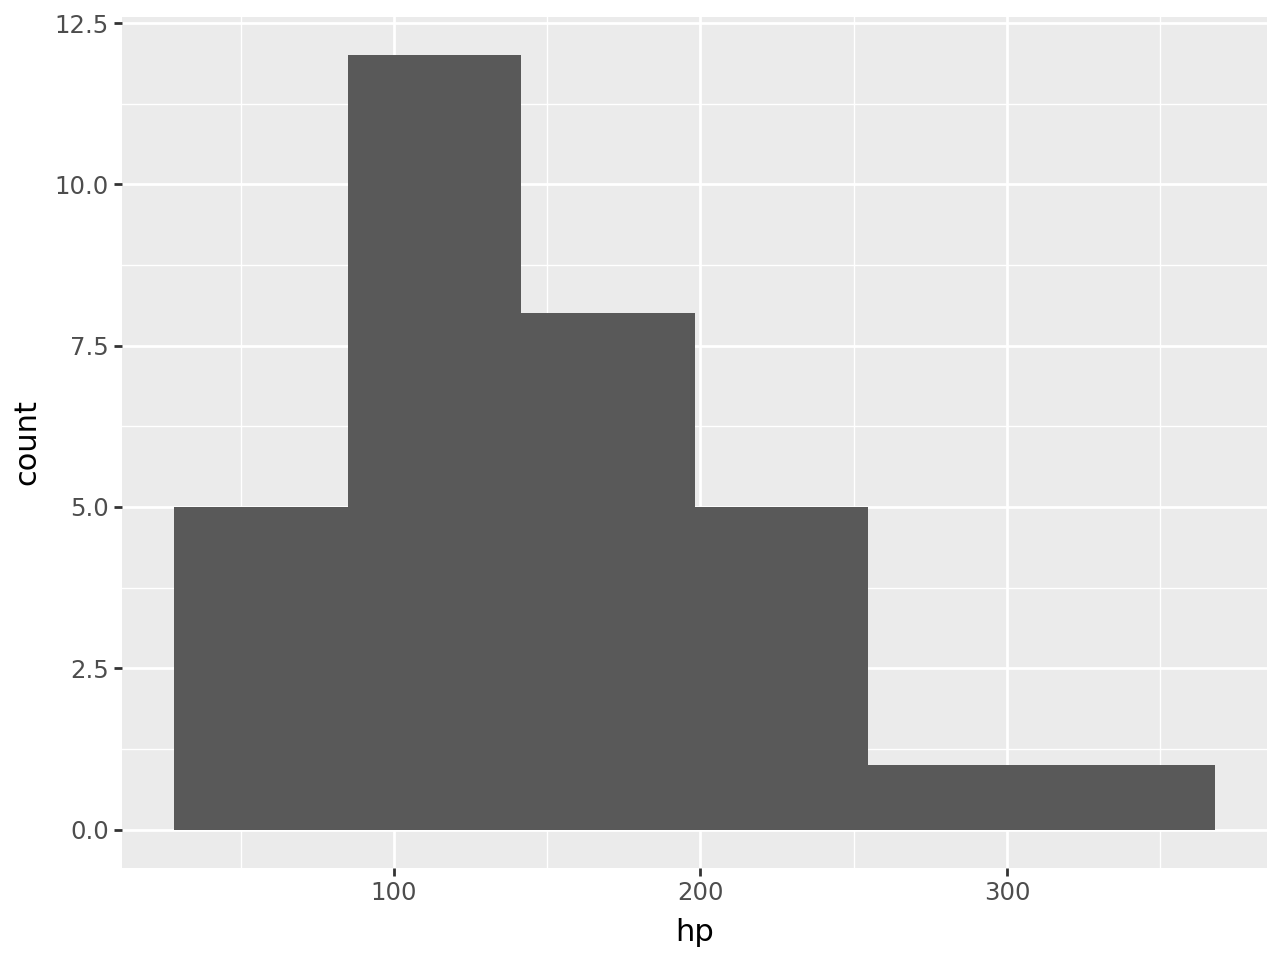

In [21]:
# when cyl is converted back to a float
df["cyl"] = df["cyl"].astype(float)
(ggplot(df,
aes(
  x = "hp",
  fill = "cyl",
  ))
+ geom_histogram()
)

When cyl is converted back to a float, the visualization advantage of color is no longer utilized.

Some of these variables, like the `cyl` variable, have numeric values that actually make sense as numbers (i.e. the number of cylinders in the engine). However, it doesn't make the most sense to "do math" with this type of variable (e.g. take averages and such) because there are so few different value this can take on AND they're an explicit choice made by the car manufacturer. So, it makes more sense to treat the `cyl` variable as a categorical variable despite it having numeric values.

You will need to keep these kinds of nuances about data in mind as you work with an increasing variety and richness of data, and do more complex things with them.

Choose 3 new `geometries` from the [data-to-viz website](https://www.data-to-viz.com/) for graphs that you'd like to explore using the `mtcars` dataset, and then create those graphs!

<ipython-input-23-f7fe3b2f6cb6>:19: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


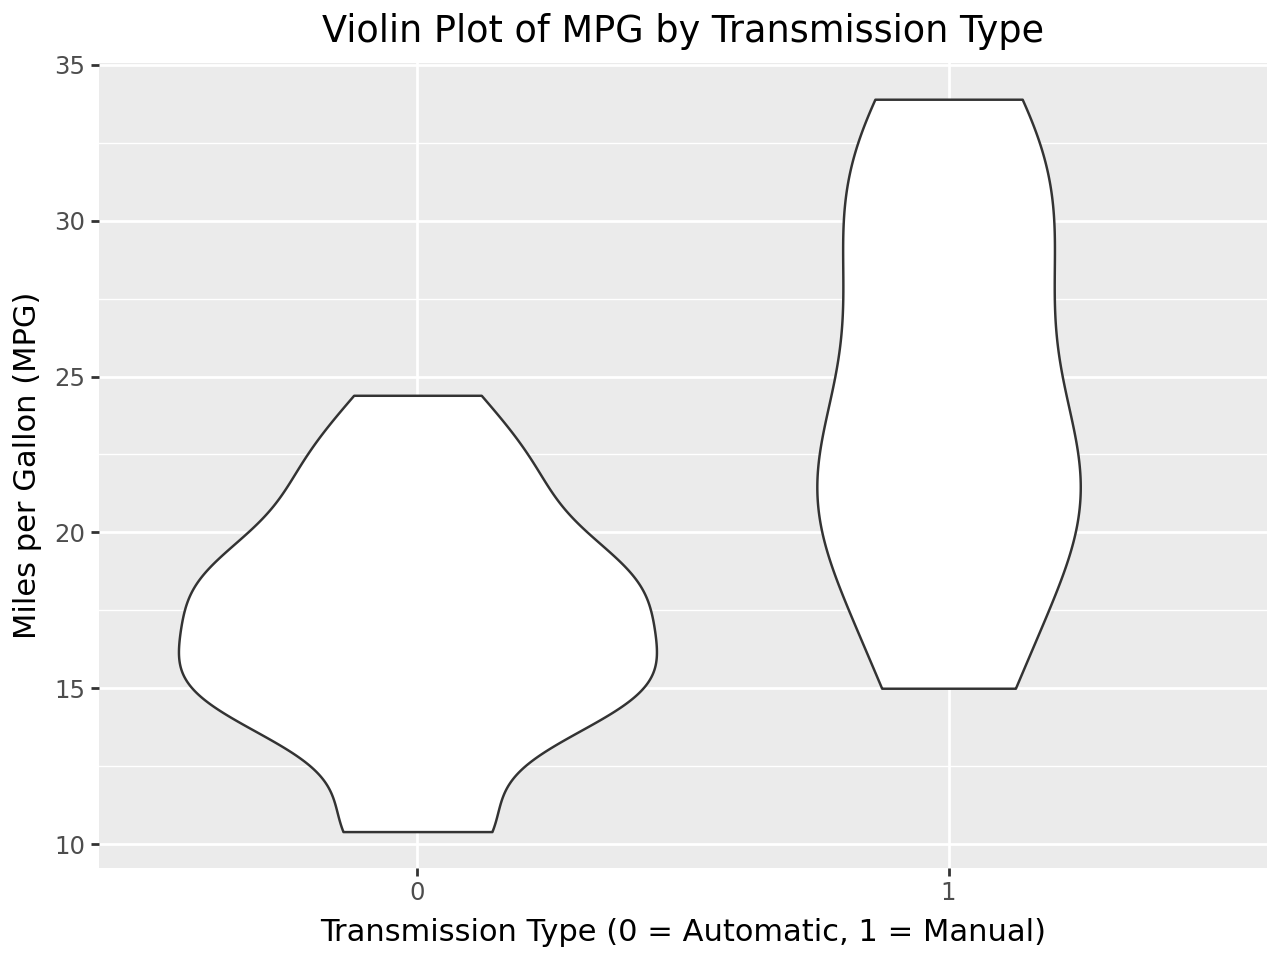

In [23]:
# Create plot with first new geometry here :

from plotnine import ggplot, aes, geom_violin, labs
import pandas as pd
from plotnine.data import mtcars

mtcars['am'] = mtcars['am'].astype('category')

plot = (ggplot(mtcars, aes(x='am', y='mpg'))
        + geom_violin()
        + labs(title="Violin Plot of MPG by Transmission Type",
          x="Transmission Type (0 = Automatic, 1 = Manual)",
          y="Miles per Gallon (MPG)")
       )

# Display the plot
print(plot)

This violin chart shows the distribution of miles per gallon over the two different transmission types.

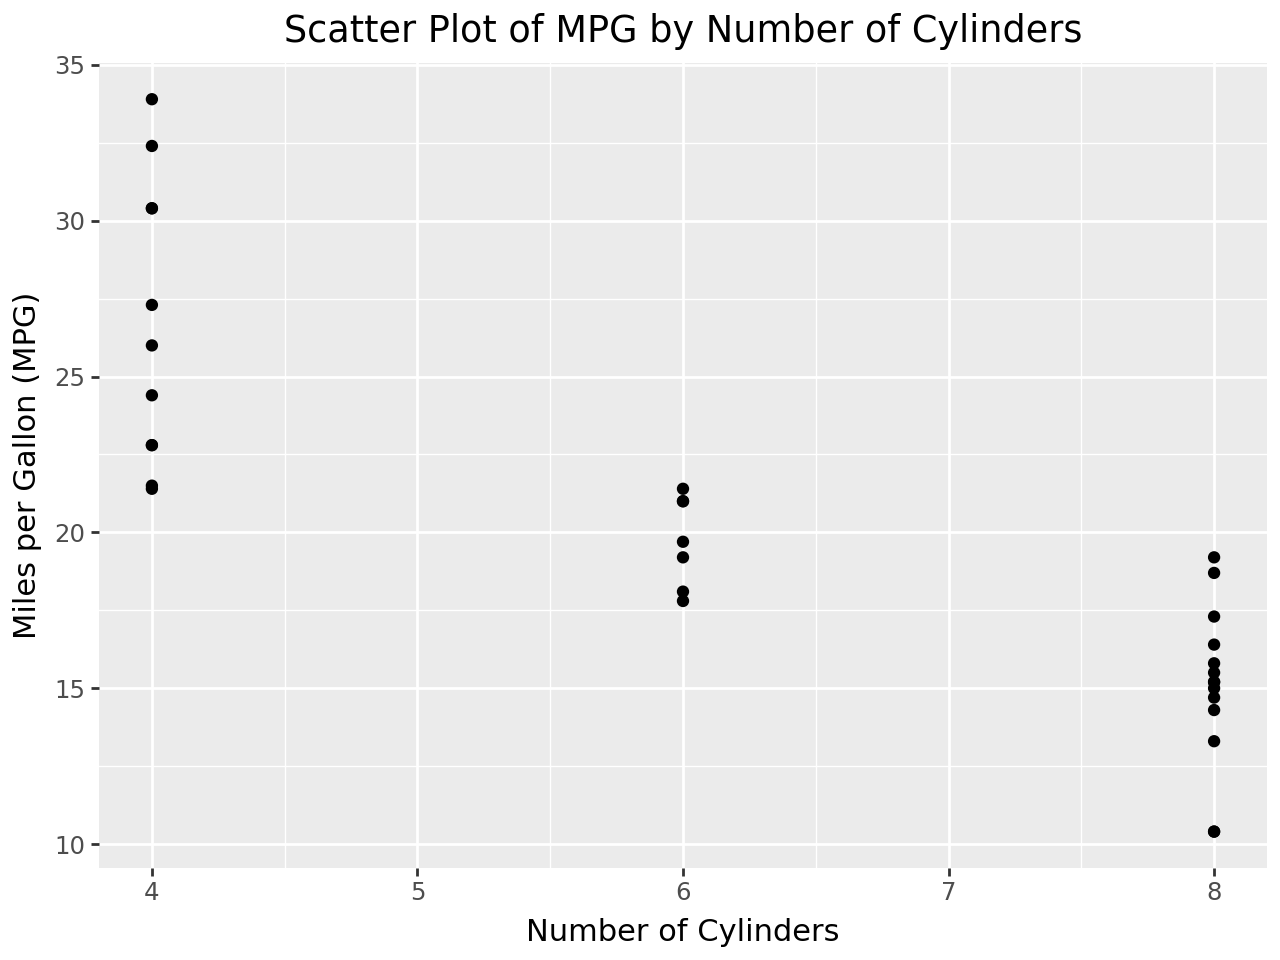

In [35]:
# create a plot with 2nd new geometry
from plotnine import ggplot, aes, labs, geom_point
import pandas as pd
from plotnine.data import mtcars

plot = (ggplot(mtcars, aes(x='cyl', y='mpg'))
        + geom_point()
        + labs(title="Scatter Plot of MPG by Number of Cylinders",
               x="Number of Cylinders",
               y="Miles per Gallon (MPG)")
       )
plot

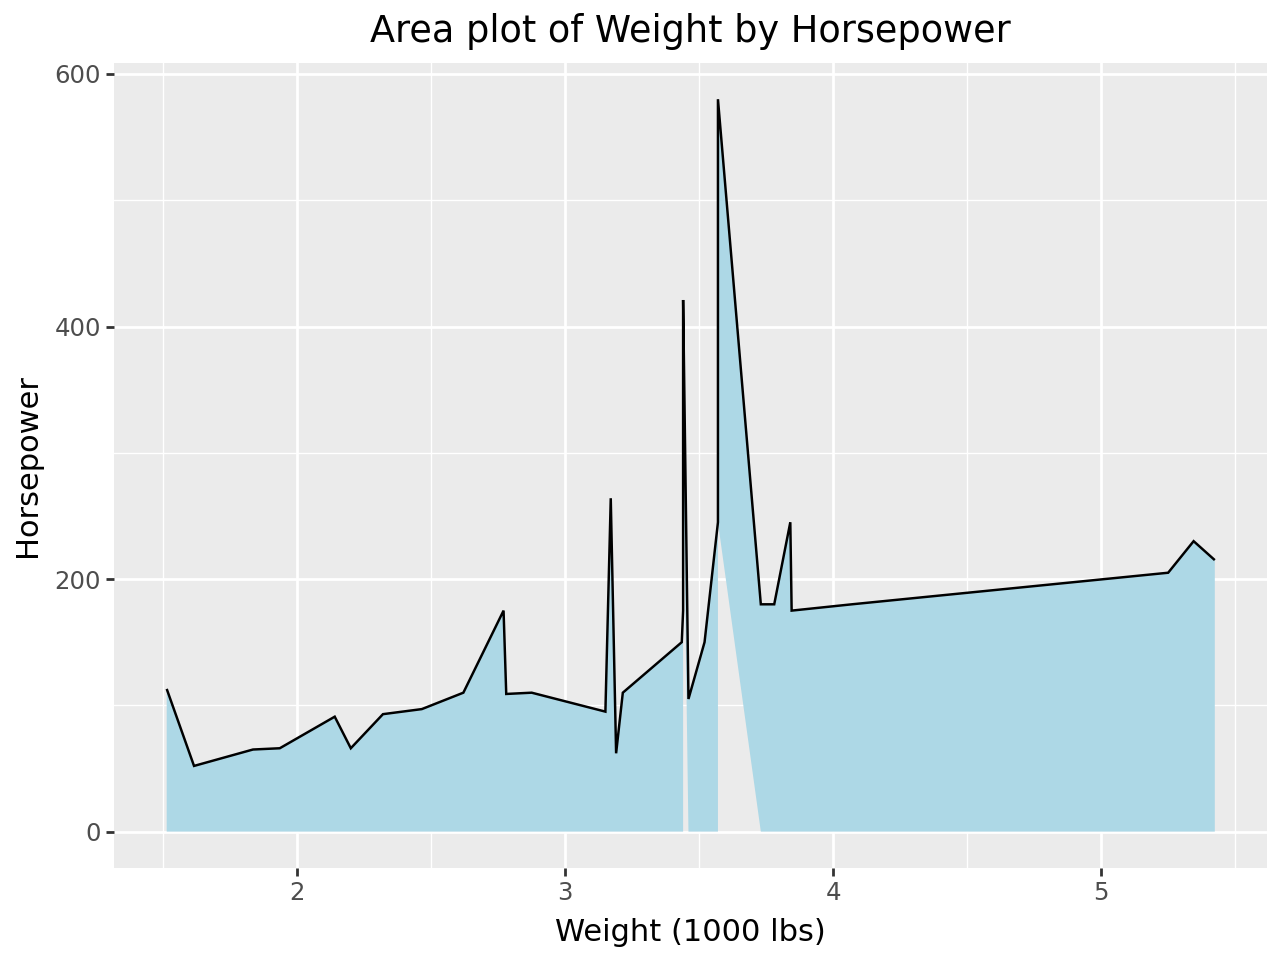

In [26]:
# Create plot with third new geometry here
import pandas as pd
from plotnine import *

plot = (ggplot(mtcars, aes(x = 'wt', y = 'hp'))
        + geom_area(colour='black', fill = 'lightblue' )
         + labs(title="Area plot of Weight by Horsepower",
         x="Weight (1000 lbs)",
         y="Horsepower"))
plot